In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
def figsave(name):
    plt.savefig(str(name)+'.png')

In [3]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                try:
                    value = int(p.get_height())
                    ax.text(_x, _y, value, ha="center") 
                except:
                    pass
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                try:
                    value = int(p.get_width())
                    ax.text(_x, _y, value, ha="left")
                except:
                    pass
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# import and manipulate data

In [4]:
#download from open MN
#http://opendata.minneapolismn.gov
name='Motorized_Foot_Scooter_Trips_'
may=pd.read_csv(name+'May_2019.csv')
june=pd.read_csv(name+'June_2019.csv')
july=pd.read_csv(name+'July_2019.csv')
august=pd.read_csv(name+'August_2019.csv')
september=pd.read_csv(name+'September_2019.csv')
october=pd.read_csv(name+'October_2019.csv')
november=pd.read_csv(name+'November_2019.csv')

In [5]:
combine=pd.concat([may,june,july,august,september,october,november],axis=0)
print(combine.columns)
print(combine.shape)

Index(['TripID', 'TripDuration', 'TripDistance', 'StartTime', 'EndTime',
       'StartCenterlineID', 'StartCenterlineType', 'EndCenterlineID',
       'EndCenterlineType', 'ObjectId'],
      dtype='object')
(1040551, 10)


In [6]:
## df.insert(loc, column, value) #*****************

In [7]:
#month (5,6,7,8,9,10,11)
combine['Month']=combine['StartTime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z').month)
#hour 1-24
combine['Hour']=combine['StartTime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z').hour)
#weekday Sunday-Saturday
combine['Weekday']=combine['StartTime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z').strftime('%A'))
#weekday 0-6
combine['Weekday_n']=combine['StartTime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z').weekday())
#week of year 20-48
combine['Woy']=combine['StartTime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z').isocalendar()[1])
#weekend 1 yes 0 no
combine['Weekend']=combine['Weekday_n'].apply(lambda x: 1 if x in[0,6] else 0)
#speed m/sec
combine['Speed']=combine['TripDistance']/combine['TripDuration']
#tripduration Min
combine['TripDuration']=combine['TripDuration']/60
#tripdistance KM
combine['TripDistance']=combine['TripDistance']/1000
#starttype 1 street 0 trial
combine['StartType']=combine['StartCenterlineType'].apply(lambda x: 1 if x=='street' else 0)
#endtype 1 street 0 trial
combine['EndType']=combine['EndCenterlineType'].apply(lambda x: 1 if x=='street' else 0)
#revenue $
combine['Revenue']=combine['TripDuration']*0.15+1
combine.shape
#lambda is better than for loop

(1040551, 20)

In [8]:
combine.reset_index(drop=True)
combine.describe()
#the min for TripDuration and Speed got negative values, which is abnormal.

,TripID,TripDuration,TripDistance,ObjectId,Month,Hour,Weekday_n,Woy,Weekend,Speed,StartType,EndType,Revenue
count,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06
mean,5.456246e+05,1.380798e+01,1.785742e+00,9.344832e+04,8.208890e+00,1.503375e+01,3.109945e+00,3.404550e+01,2.612529e-01,2.672093e+00,8.815262e-01,8.635848e-01,3.071196e+00
std,3.127391e+05,1.864637e+01,1.970666e+00,6.378651e+04,1.515814e+00,7.621021e+00,1.956305e+00,6.562256e+00,4.393177e-01,1.781940e+00,3.231684e-01,3.432291e-01,2.796955e+00
min,1.000000e+03,-1.301667e+01,1.000000e-03,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,-2.606000e+02,0.000000e+00,0.000000e+00,-9.525000e-01
25%,2.732805e+05,4.483333e+00,6.110000e-01,3.716300e+04,7.000000e+00,1.300000e+01,1.000000e+00,2.900000e+01,0.000000e+00,1.655844e+00,1.000000e+00,1.000000e+00,1.672500e+00
50%,5.503420e+05,7.700000e+00,1.187000e+00,8.621100e+04,8.000000e+00,1.800000e+01,3.000000e+00,3.500000e+01,0.000000e+00,2.701829e+00,1.000000e+00,1.000000e+00,2.155000e+00
75%,8.164535e+05,1.533333e+01,2.216000e+00,1.418740e+05,9.000000e+00,2.100000e+01,5.000000e+00,3.900000e+01,1.000000e+00,3.628081e+00,1.000000e+00,1.000000e+00,3.300000e+00
max,1.083457e+06,4.198000e+02,3.858300e+01,2.497730e+05,1.100000e+01,2.300000e+01,6.000000e+00,4.800000e+01,1.000000e+00,3.076522e+02,1.000000e+00,1.000000e+00,6.397000e+01


In [9]:
#make the numbers in TripDuration, Speed, Revenue become positive
combine['TripDuration']=combine['TripDuration'].abs()
combine['Speed']=combine['Speed'].abs()
combine['Revenue']=combine['Revenue'].abs()
combine.describe()

,TripID,TripDuration,TripDistance,ObjectId,Month,Hour,Weekday_n,Woy,Weekend,Speed,StartType,EndType,Revenue
count,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06,1.040551e+06
mean,5.456246e+05,1.380800e+01,1.785742e+00,9.344832e+04,8.208890e+00,1.503375e+01,3.109945e+00,3.404550e+01,2.612529e-01,2.672871e+00,8.815262e-01,8.635848e-01,3.071198e+00
std,3.127391e+05,1.864635e+01,1.970666e+00,6.378651e+04,1.515814e+00,7.621021e+00,1.956305e+00,6.562256e+00,4.393177e-01,1.780772e+00,3.231684e-01,3.432291e-01,2.796953e+00
min,1.000000e+03,1.666667e-02,1.000000e-03,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,9.098353e-05,0.000000e+00,0.000000e+00,8.250000e-01
25%,2.732805e+05,4.483333e+00,6.110000e-01,3.716300e+04,7.000000e+00,1.300000e+01,1.000000e+00,2.900000e+01,0.000000e+00,1.655855e+00,1.000000e+00,1.000000e+00,1.672500e+00
50%,5.503420e+05,7.700000e+00,1.187000e+00,8.621100e+04,8.000000e+00,1.800000e+01,3.000000e+00,3.500000e+01,0.000000e+00,2.701835e+00,1.000000e+00,1.000000e+00,2.155000e+00
75%,8.164535e+05,1.533333e+01,2.216000e+00,1.418740e+05,9.000000e+00,2.100000e+01,5.000000e+00,3.900000e+01,1.000000e+00,3.628099e+00,1.000000e+00,1.000000e+00,3.300000e+00
max,1.083457e+06,4.198000e+02,3.858300e+01,2.497730e+05,1.100000e+01,2.300000e+01,6.000000e+00,4.800000e+01,1.000000e+00,3.076522e+02,1.000000e+00,1.000000e+00,6.397000e+01


In [10]:
combine.columns
#TripID,StartTime, EndTime, StartCenterlineID, StartCenterlineType,EndCenterlineID,EndCenterlineType
#,ObjectId are not what we focusing on

Index(['TripID', 'TripDuration', 'TripDistance', 'StartTime', 'EndTime',
       'StartCenterlineID', 'StartCenterlineType', 'EndCenterlineID',
       'EndCenterlineType', 'ObjectId', 'Month', 'Hour', 'Weekday',
       'Weekday_n', 'Woy', 'Weekend', 'Speed', 'StartType', 'EndType',
       'Revenue'],
      dtype='object')

In [11]:
#drop unfocus columns
combine.drop(['TripID','StartTime','EndTime','StartCenterlineID','EndCenterlineID','ObjectId'],axis=1,inplace=True)
combine.shape

(1040551, 14)

In [12]:
print(combine.isnull().sum())
backup=combine.copy(deep=True)#duplicate a new df for backup
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

TripDuration           0
TripDistance           0
StartCenterlineType    0
EndCenterlineType      0
Month                  0
Hour                   0
Weekday                0
Weekday_n              0
Woy                    0
Weekend                0
Speed                  0
StartType              0
EndType                0
Revenue                0
dtype: int64


# data describe

In [13]:
# according to MN law and scooter features(take lime as example)
# the max speed for scooter is 15 miles/hr which is 6.71 m/sec
# the general max distance with full battery is 30 miles which is 48km
'''
7. Scooters have limits.

Lime scooters in Rochester will be programmed to a maximum speed of 15 miles per hour,
which Probst said mimics biking speeds on city streets.

“We limit these to work like a bike product, because we want these to be used in much the same way
that a bike would be used, whether in a bike lane or at the side of a road,” Probst said.

With a fully charged battery, the scooters can travel approximately 30 miles before needing more power.
The actual distance will depend on several factors, Probst said.
'''
#sources: https://www.postbulletin.com/news/local/10-things-to-know-about-lime-scooters/article_d52c6066-b2ee-11e9-b40b-030de741fc02.html

'\n7. Scooters have limits.\n\nLime scooters in Rochester will be programmed to a maximum speed of 15 miles per hour,\nwhich Probst said mimics biking speeds on city streets.\n\n“We limit these to work like a bike product, because we want these to be used in much the same way\nthat a bike would be used, whether in a bike lane or at the side of a road,” Probst said.\n\nWith a fully charged battery, the scooters can travel approximately 30 miles before needing more power.\nThe actual distance will depend on several factors, Probst said.\n'

In [14]:
# data points that corrosponds to law and restriction
legle=combine[(combine['Speed']<=7)&(combine['TripDuration']<=50000)]
print(legle.shape)
legle.head()


(1035414, 14)


,TripDuration,TripDistance,StartCenterlineType,EndCenterlineType,Month,Hour,Weekday,Weekday_n,Woy,Weekend,Speed,StartType,EndType,Revenue
0,47.766667,9.521,trail,trail,5,20,Monday,0,20,1,3.322052,0,0,8.1650
1,23.116667,5.753,street,street,5,20,Monday,0,20,1,4.147801,1,1,4.4675
2,16.033333,1.630,street,street,5,20,Monday,0,20,1,1.694387,1,1,3.4050
3,7.050000,2.149,street,street,5,20,Monday,0,20,1,5.080378,1,1,2.0575
4,63.550000,6.943,street,trail,5,20,Monday,0,20,1,1.820876,1,0,10.5325


In [15]:
# data points that dont corrospond to law and restriction
illegle=combine[(combine['Speed']>7)|(combine['TripDuration']>50000)]
print(illegle.shape,'\n')
illegle.head()

(5137, 14) 



,TripDuration,TripDistance,StartCenterlineType,EndCenterlineType,Month,Hour,Weekday,Weekday_n,Woy,Weekend,Speed,StartType,EndType,Revenue
269,3.650000,14.840,street,street,5,14,Monday,0,20,1,67.762557,1,1,1.5475
702,2.966667,11.616,street,street,5,7,Tuesday,1,20,0,65.258427,1,1,1.4450
1765,11.083333,5.450,street,trail,5,1,Wednesday,2,20,0,8.195489,1,0,2.6625
1883,7.633333,3.330,trail,street,5,11,Wednesday,2,20,0,7.270742,0,1,2.1450
1907,10.433333,4.411,street,street,5,2,Wednesday,2,20,0,7.046326,1,1,2.5650


In [16]:
legle['t1']=legle['StartType'].apply(lambda x: x+1)
legle['t2']=legle['EndType'].apply(lambda x: x+2)
legle['Type']=legle['t1']*legle['t2']
legle['Type1']=legle['StartType']+legle['EndType']

dic1={2:'tt',3:'ts',4:'st',6:'ss'}
dic2={1:'ts/st',2:'ss',0:'tt'}
legle['Type_st']=legle['Type'].map(dic1)
legle['Type_commute']=legle['Type1'].map(dic2)

dic3={'st':1,'ts':2,'tt':3,'ss':4}
dic4={'ss':1,'ts/st':2,'tt':3}
legle['Type_st_n']=legle['Type_st'].map(dic3)
legle['Type_commute_n']=legle['Type_commute'].map(dic4)

In [17]:
legle.describe()

,TripDuration,TripDistance,Month,Hour,Weekday_n,Woy,Weekend,Speed,StartType,EndType,Revenue,t1,t2,Type,Type1,Type_st_n,Type_commute_n
count,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06,1.035414e+06
mean,1.383448e+01,1.768814e+00,8.209211e+00,1.503352e+01,3.110905e+00,3.404604e+01,2.613322e-01,2.629806e+00,8.815170e-01,8.635821e-01,3.075170e+00,1.881517e+00,2.863582e+00,5.412076e+00,1.745099e+00,3.515223e+00,1.254901e+00
std,1.867654e+01,1.909334e+00,1.516708e+00,7.620938e+00,1.956472e+00,6.567032e+00,4.393607e-01,1.369242e+00,3.231794e-01,3.432319e-01,2.801482e+00,3.231794e-01,3.432319e-01,1.177900e+00,5.202385e-01,9.911394e-01,5.202385e-01
min,1.666667e-02,1.000000e-03,5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,9.098353e-05,0.000000e+00,0.000000e+00,9.525000e-01,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,4.483333e+00,6.100000e-01,7.000000e+00,1.300000e+01,1.000000e+00,2.900000e+01,0.000000e+00,1.649351e+00,1.000000e+00,1.000000e+00,1.672500e+00,2.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00
50%,7.716667e+00,1.182000e+00,8.000000e+00,1.800000e+01,3.000000e+00,3.500000e+01,0.000000e+00,2.692781e+00,1.000000e+00,1.000000e+00,2.157500e+00,2.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00
75%,1.536667e+01,2.202000e+00,9.000000e+00,2.100000e+01,5.000000e+00,3.900000e+01,1.000000e+00,3.612500e+00,1.000000e+00,1.000000e+00,3.305000e+00,2.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00
max,4.198000e+02,3.848400e+01,1.100000e+01,2.300000e+01,6.000000e+00,4.800000e+01,1.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,6.397000e+01,2.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00


In [18]:
legle.columns

Index(['TripDuration', 'TripDistance', 'StartCenterlineType',
       'EndCenterlineType', 'Month', 'Hour', 'Weekday', 'Weekday_n', 'Woy',
       'Weekend', 'Speed', 'StartType', 'EndType', 'Revenue', 't1', 't2',
       'Type', 'Type1', 'Type_st', 'Type_commute', 'Type_st_n',
       'Type_commute_n'],
      dtype='object')

In [19]:
legle.drop(['StartCenterlineType','EndCenterlineType', 't1', 't2','Type', 'Type1'],inplace=True,axis=1)
legle.columns

Index(['TripDuration', 'TripDistance', 'Month', 'Hour', 'Weekday', 'Weekday_n',
       'Woy', 'Weekend', 'Speed', 'StartType', 'EndType', 'Revenue', 'Type_st',
       'Type_commute', 'Type_st_n', 'Type_commute_n'],
      dtype='object')

In [20]:
legle.isnull().sum()

TripDuration      0
TripDistance      0
Month             0
Hour              0
Weekday           0
Weekday_n         0
Woy               0
Weekend           0
Speed             0
StartType         0
EndType           0
Revenue           0
Type_st           0
Type_commute      0
Type_st_n         0
Type_commute_n    0
dtype: int64

In [21]:
duration_label=['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+']
distance_label=['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+']
speed_label=['0-1','1-3','3-5','5-7']
weekday_label=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
month_label=['May','June','July','August','September','October','November']

# visuals

In [22]:
def tripplot(data):
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
    maxduration=round(data['TripDuration'].max())+1
    data['DurationCat(Min)']=pd.cut((data['TripDuration']),bins=[0,5,10,15,20,25,30,60,120,maxduration]
                                   ,labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+'])
    data['DurationCat(Min)_n']=pd.cut((data['TripDuration']),bins=[0,5,10,15,20,25,30,60,120,maxduration]
                                   ,labels=['1','2','3','4','5','6','7','8','9'])
    
    sns.countplot(x='DurationCat(Min)',data=data,ax=ax1)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    show_values_on_bars(ax1)
    ax1.set_title("TripDuration")
    
    
    maxdistance=round(data['TripDistance'].max())+1
    data['DistanceCat(KM)']=pd.cut((data['TripDistance']),bins=[0,1,3,5,10,15,20,25,30,maxdistance]
                                  ,labels=['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+'])
    
    data['DistanceCat(KM)_n']=pd.cut((data['TripDistance']),bins=[0,1,3,5,10,15,20,25,30,maxdistance]
                                  ,labels=['1','2','3','4','5','6','7','8','9'])
    
    
    sns.countplot(x='DistanceCat(KM)',data=data,ax=ax2)
    for tick in ax2.get_xticklabels():
        tick.set_rotation(90)
    show_values_on_bars(ax2)
    ax2.set_title("TripDistance")#sub-title
    
    fig.suptitle(#sup-title#*******
        'TripDuration and TripDistance',fontsize=20)


## General info

### People tend to rent a scooter for least then 10 mins and for traveling least then 3 km
### which is typically a short distance commuting action

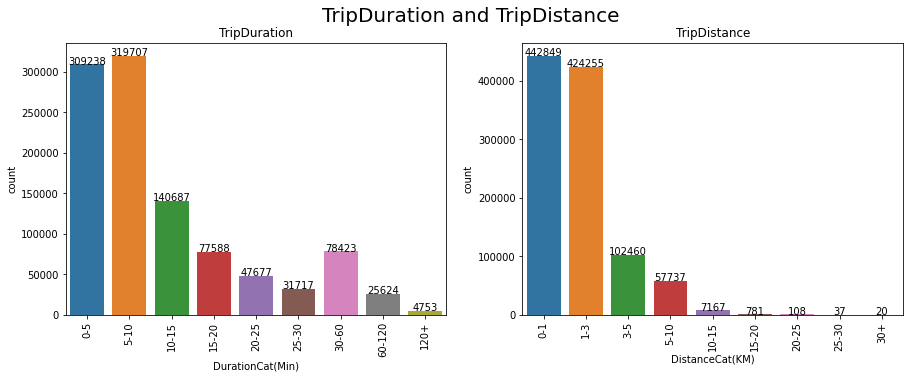

In [23]:
tripplot(legle)

In [24]:
def tripplot_percent(data):
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
    df=data.groupby('DurationCat(Min)',sort=False).size()/len(legle)*100
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    
    ax1.set_title("TripDuration")
    ax1.index=[['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+']]
    ax1.bar(df.index,list(df))
    show_values_on_bars(ax1)
    
    df=data.groupby('DistanceCat(KM)',sort=False).size()/len(legle)*100
    ax2.bar(df.index,list(df))
    for tick in ax2.get_xticklabels():
        tick.set_rotation(90)
    show_values_on_bars(ax2)
    ax2.index=['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+']
    ax2.bar(df.index,list(df))
    ax2.set_title("TripDistance")#sub-title
    
    fig.suptitle(#sup-title#*******
        'TripDuration and TripDistance',fontsize=20)



### about 60% rent a scooter less then 10 mins and 82% less then 3 miles

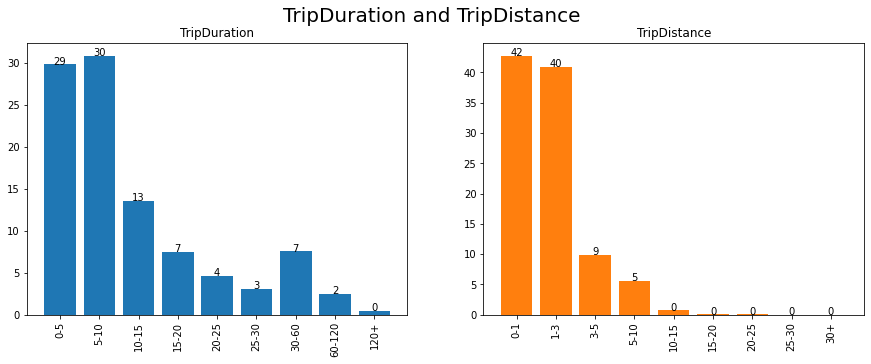

In [25]:
tripplot_percent(legle)

In [26]:
def renttime(data):
    plt.figure(figsize=(10,5))
    sns.countplot(x='Hour',data=data)
    plt.title('renttime',fontsize=20)

### People tend to rent a scooter between 5pm to 0 am
### the low peak of renttime is 4am to 11am

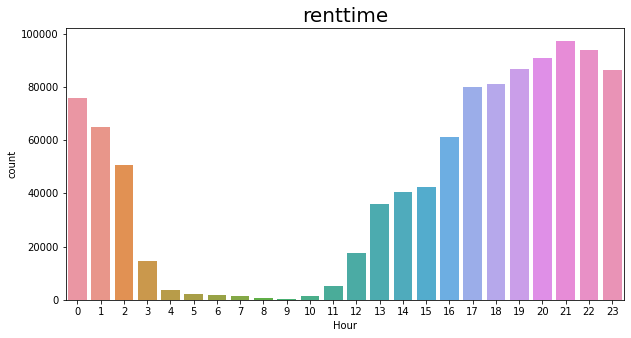

In [27]:
renttime(legle)

In [28]:
def speedplot_legle(data):
    print('AverageSpeed',data.Speed.mean())
    fig, ax1 = plt.subplots(1, 1,figsize=(15,5))
    
    temp=data['Speed']
    maxspeed=temp.max()+1
    data['SpeedCat(m/Min)']=pd.cut(data['Speed'],bins=[0,1,3,5,7],labels=['0-1','1-3','3-5','5-7'])
    data['SpeedCat(m/Min)_n']=pd.cut(data['Speed'],bins=[0,1,3,5,7],labels=['1','2','3','4'])
    df=data.groupby('SpeedCat(m/Min)').size()/len(legle)*100
    #df = df.rename('percent').reset_index()#name the column
    ax1.bar(df.index,list(df))
    ax1.index=(['0-1','1-3','3-5','5-7'])
    #g.xticks(rotation=90)
    plt.title('Speed_m/Min',fontsize=20)
    show_values_on_bars(ax1)
    plt.show()   

### Most people (81%) were riding in 1 - 5 m/s which is 6.71 to 11.18 mph

AverageSpeed 2.6298060993007932


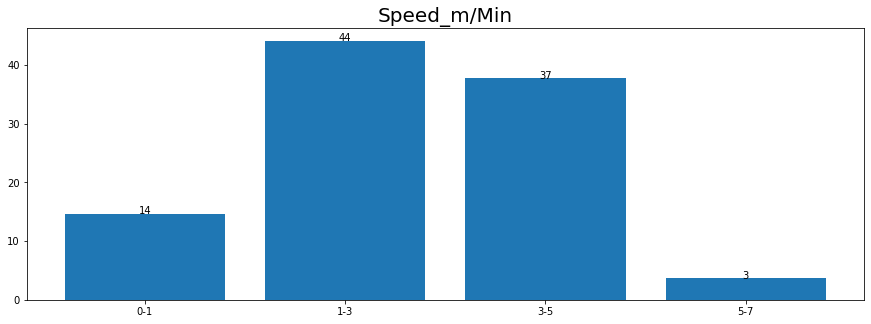

In [29]:
speedplot_legle(legle)

## Weekday
- Thursday and Saturday are the days having most users
- Weekend plays an immportant role here for distance, duraiton and speed
- From 3am to 12pm is the time window that has is the low peak of renting 

### People tend to rent a scooter a bit more on Thursday and Saturday

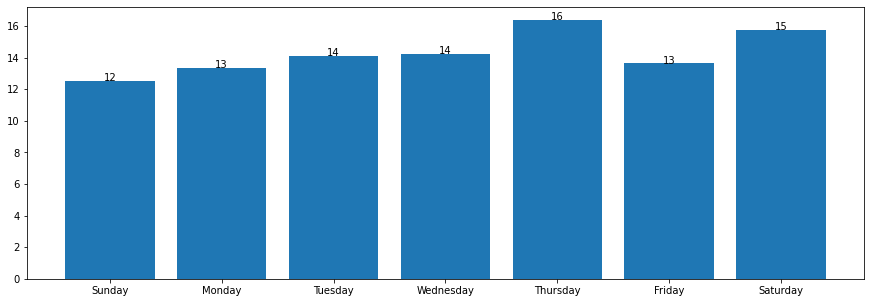

In [30]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
df=legle.groupby('Weekday',sort=False).size()/len(legle)*100
df.index=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(df.index,list(df))
show_values_on_bars(ax, "v", 0.4)

In [31]:
def legel_wkd(target,name,c):
    temp=legle.groupby('Weekday', sort=False)[target].mean(
        ).reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])[0:].to_frame()
    sns.barplot(x=temp.index,y=target,data=temp,ax=axes[c])
    axes[c].set_title('Average {0} by weekday\n'.format(name))
    axes[c].set_ylabel('Average {0}'.format(name))
    for ax in axes:
        ax.tick_params(labelrotation=90,axis='x')

### It seems like weekend and weekday play an important role when it comes to user behavior

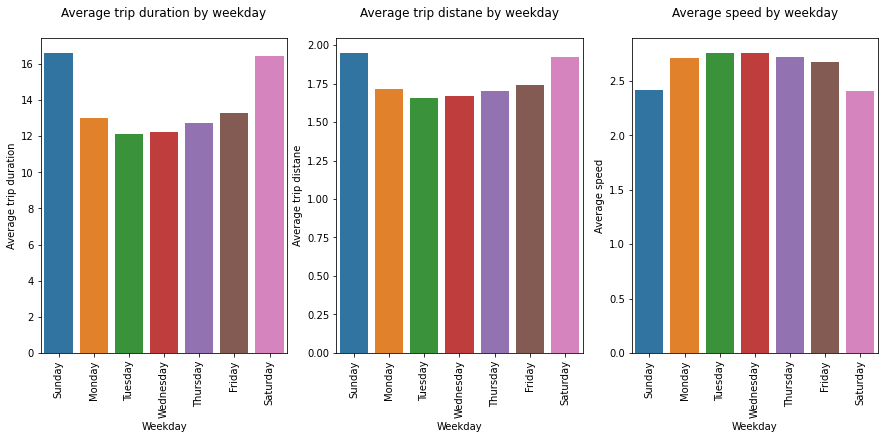

In [32]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5, forward=True)
plt.subplots_adjust(top=1,hspace =  1 )
legel_wkd("TripDuration","trip duration",0)
legel_wkd("TripDistance","trip distane",1)
legel_wkd("Speed","speed",2)

### 3am to 12pm is the lowest renting period that people rent a scooter.
### charging and arrangine the scooter should be done at this period.

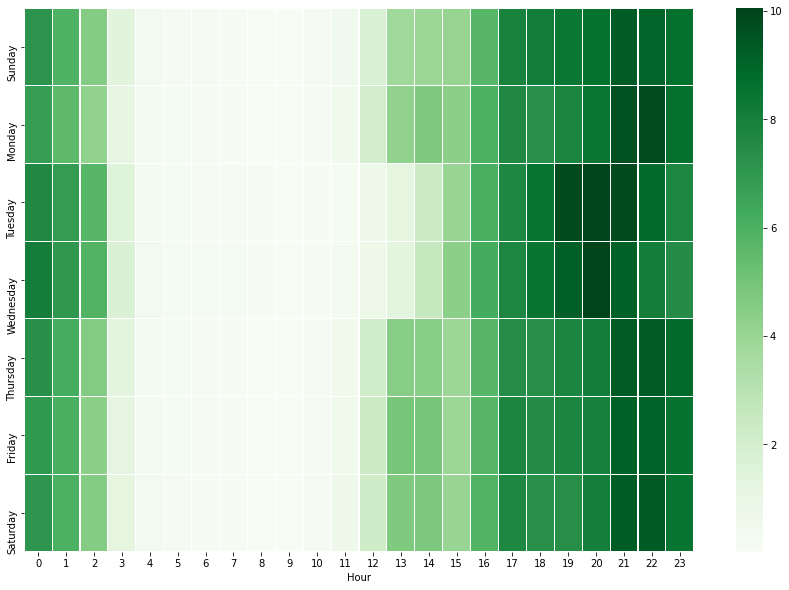

In [33]:
plt.figure(figsize=(15,10))
df=legle.groupby('Weekday')['Hour'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()


temp=df.pivot("Weekday", "Hour", "percent")
temp.index=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# Draw a heatmap with the numeric values in each cell
sns.heatmap(temp,linewidths=.1,cmap="Greens")

## Month
- September is the month having the highest users
- May is the month having the lowest users
- From May to November the average distance and duration are getting low
- Not a obvious pattern in trip amount between weekdays and month

In [34]:
def barpercent(data,target,hue):
    plt.figure()
    ax = sns.barplot(x=target, y=target, data=data, estimator=lambda x: len(x) / len(data) * 100,hue=hue)
    ax.set(ylabel="Percent")

### People tend to use scooter in August and September the most
### Maybe summer vacation could be taken into account

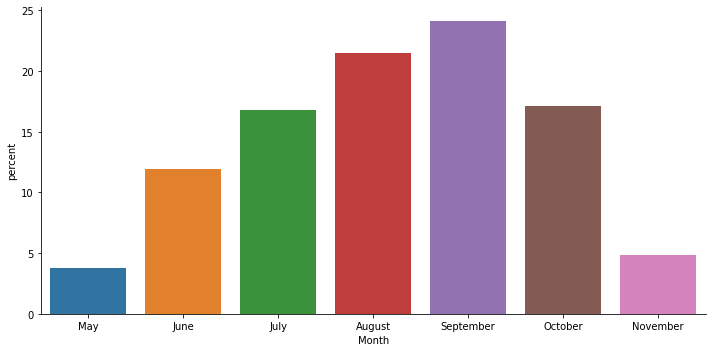

In [35]:
df=legle.groupby('Month',sort=False).size()/len(legle)*100#percentagge
df = df.rename('percent').reset_index()#name the column
g = sns.catplot(x='Month',y='percent',kind='bar',data=df,height=5, aspect=2)
g.set_xticklabels(['May','June','July','August','September','October','November'])#*** X order

### From May to November, the average trip duraiton is getting short

<BarContainer object of 7 artists>

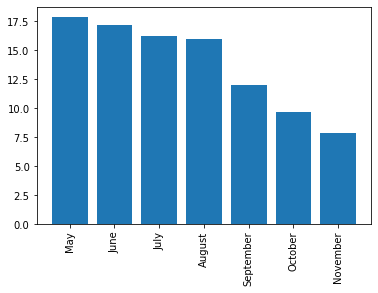

In [36]:
df=legle.groupby('Month')['TripDuration'].mean()
df = df.rename('AverateTripDuration(Min)').reset_index()#name the column
labels=['May','June','July','August','September','October','November']
plt.xticks(np.arange(5,12),labels,rotation=90)
plt.bar(x=df['Month'],height=df['AverateTripDuration(Min)'])

### From May to November, the average trip distance is getting short

<BarContainer object of 7 artists>

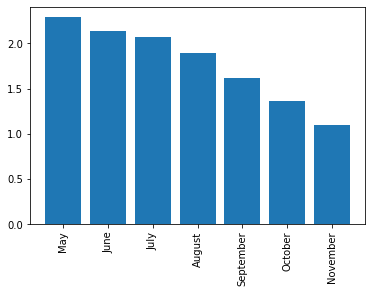

In [37]:
df=legle.groupby('Month')['TripDistance'].mean()
df = df.rename('Averate Trip Distance(KM)').reset_index()#name the column
labels=['May','June','July','August','September','October','November']
plt.xticks(np.arange(5,12),labels,rotation=90)
plt.bar(x=df['Month'],height=df['Averate Trip Distance(KM)'])

### not a obvious pattern in trip amount between weekdays and month

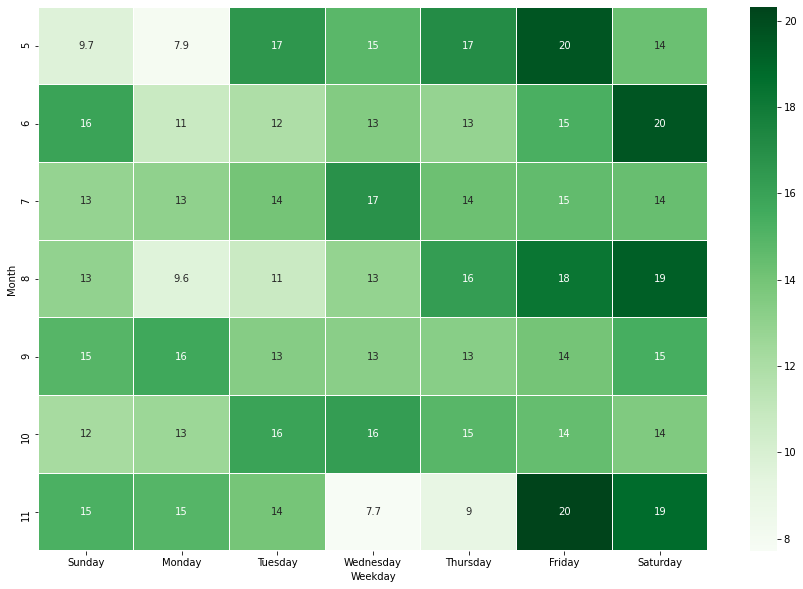

In [38]:
plt.figure(figsize=(15,10))
df=legle.groupby('Month')['Weekday'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()


temp=df.pivot("Month", "Weekday", "percent")
temp=temp[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']]
# Draw a heatmap with the numeric values in each cell
sns.heatmap(temp,linewidths=.1,cmap="Greens",annot=True)

## Summer
- During summer time, people tend to have longer duration
- tend to have longer distance
- but the speed is slower

In [39]:
legle['Summer']=legle['Month'].apply(lambda x: 1 if x in [6,7,8] else 0)

### During summer time(June to August) people tend to ride scooter for longer period

In [40]:
df=legle.groupby('Summer')['DurationCat(Min)'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()

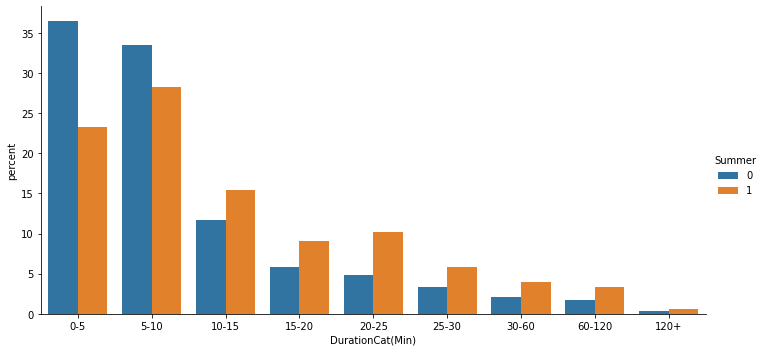

In [41]:
df=legle.groupby('Summer')['DurationCat(Min)'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
g = sns.catplot(x='DurationCat(Min)',y='percent',hue='Summer',kind='bar',data=df,height=5, aspect=2)
g.set_xticklabels(['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+'])#*** X order

### During summer time(June to August) people tend to ride scooter for longer distance

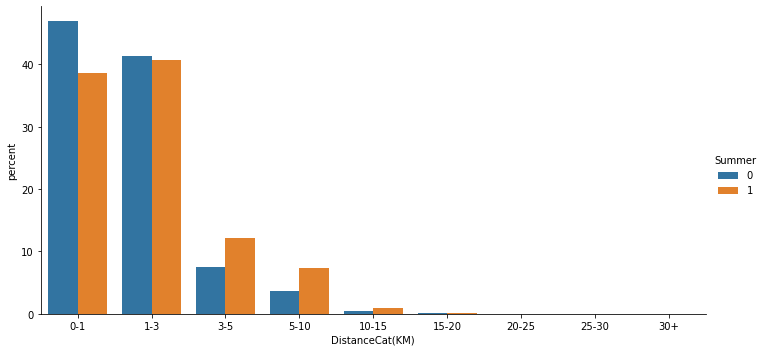

In [42]:
df=legle.groupby('Summer')['DistanceCat(KM)'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
g = sns.catplot(x='DistanceCat(KM)',y='percent',hue='Summer',kind='bar',data=df,height=5, aspect=2)
g.set_xticklabels(['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+'])#*** X order

### During summer people tend to ride a scooter in a slow or fast speed

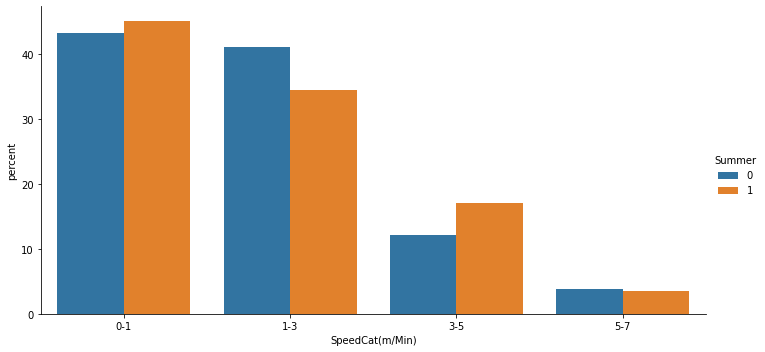

In [43]:
df=legle.groupby('Summer')['SpeedCat(m/Min)'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
g = sns.catplot(x='SpeedCat(m/Min)',y='percent',hue='Summer',kind='bar',data=df,height=5, aspect=2)
g.set_xticklabels(['0-1','1-3','3-5','5-7'])#*** X order

### It is obviously that summer or not has big impact on user behavior in terms of weekday

In [44]:
def feature_n(data):
    maxduration=round(data['TripDuration'].max())+1
    data['DurationCat(Min)_n']=pd.cut((data['TripDuration']),bins=[0,5,10,15,20,25,30,60,120,maxduration]
                                   ,labels=range(9))
    maxdistance=round(data['TripDistance'].max())+1
    data['DistanceCat(KM)_n']=pd.cut((data['TripDistance']),bins=[0,1,3,5,10,15,20,25,30,maxdistance]
                                  ,labels=range(9))
    data['SpeedCat(m/Min)_n']=pd.cut(data['Speed'],bins=[0,1,3,5,7],labels=range(4))

In [45]:
feature_n(legle)

In [46]:
def heatplot(data,target,label,loc):
    
    df=data.groupby('Weekday')[target].value_counts(normalize=True)
    df = df.rename('total').reset_index()
    df['total']=df['total'].mul(100)


    temp=df.pivot("Weekday", target, "total")
    temp=temp.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
    
    temp=temp[label]
    # Draw a heatmap with the numeric values in each cell
    sns.heatmap(temp,linewidths=.1,cmap="Greens",annot=True,vmax=40,vmin=0,ax=axes[loc])
    plt.suptitle('Percentage by Weekday')
    
    #plt.title('Line Plot by Summer '+target.replace('_n',''))

Text(0.5, 1.0, 'Summer')

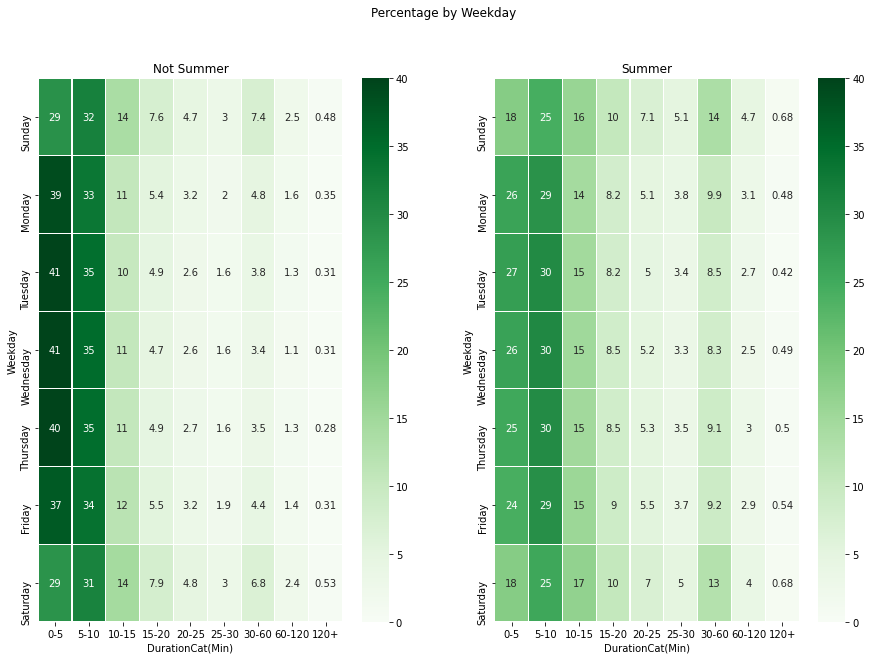

In [47]:
fig,axes=plt.subplots(1,2,figsize=(15,10))
heatplot(legle[legle['Summer']==0],'DurationCat(Min)',duration_label,0)
axes[0].set_title('Not Summer')
heatplot(legle[legle['Summer']==1],'DurationCat(Min)',duration_label,1)
axes[1].set_title('Summer')

Text(0.5, 1.0, 'Summer')

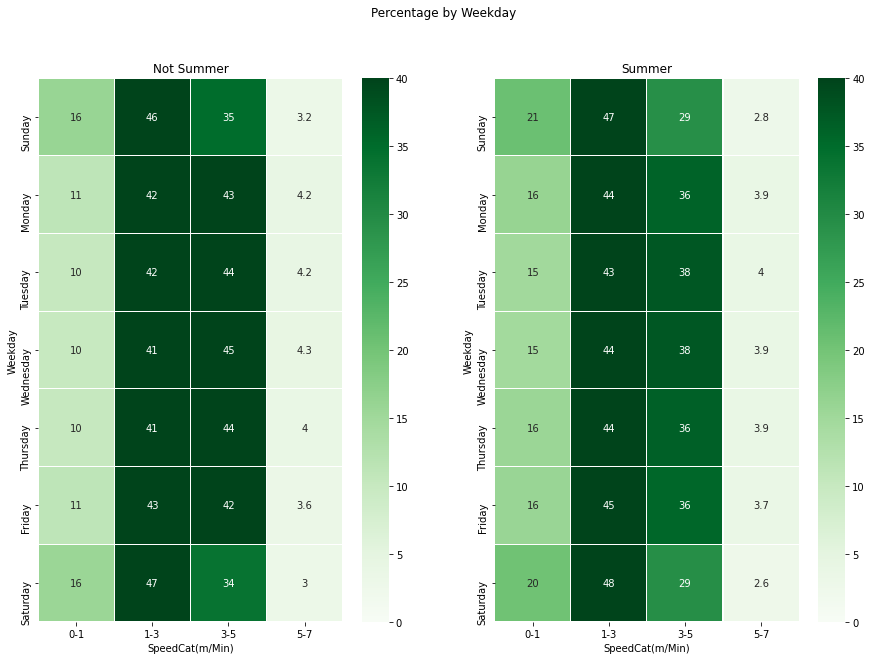

In [48]:
#distance_label_summer=['0-1', '1-3', '3-5', '5-10', '10-15', '15-20', '20-25', '25-30']
fig,axes=plt.subplots(1,2,figsize=(15,10))
heatplot(legle[legle['Summer']==0],'SpeedCat(m/Min)',speed_label,0)
axes[0].set_title('Not Summer')
heatplot(legle[legle['Summer']==1],'SpeedCat(m/Min)',speed_label,1)
axes[1].set_title('Summer')

# StartType and EndType
- People tend to use scooter to travel street by street the most
- The portion of each Trip Type doesn't change siginificantly in month
- The pattern doesn't change in summer or nonsummer time
- The traveling habbit has something to do with Trip Type

In [49]:
legle['Type_commute'].value_counts()

ss       813276
ts/st    180348
tt        41790
Name: Type_commute, dtype: int64

### Travel Type doens't change siginificantly in month

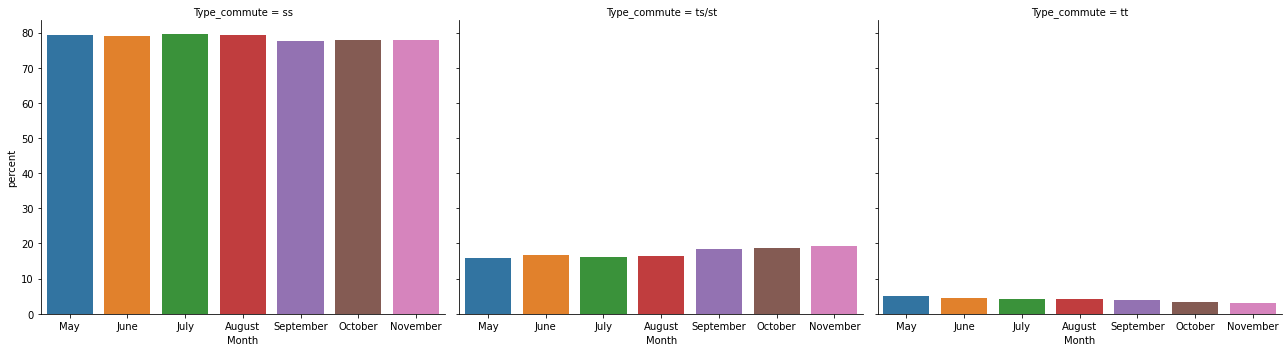

In [50]:
df=legle.groupby(['Month'])['Type_commute'].value_counts(normalize=True)#percentagge
df=df.mul(100)
df = df.rename('percent').reset_index()#name the column
g = sns.catplot(x='Month',y='percent',kind='bar',data=df,height=5, aspect=1.2,col='Type_commute')#colwrap=2)
g.set_xticklabels(['May','June','July','August','September','October','November'])#*** X order

In [51]:
def lineplot_commute(data,target):
    plt.figure(figsize=(15,5))
    
    df=data.groupby([target])['Type_commute'].value_counts(normalize=True)
    df = df.mul(100)
    df = df.rename('percent').reset_index()
    df
    n=0
    for i in ['ss','ts/st','tt']:
        temp=df[df['Type_commute']==i][[target,'percent']].sort_values(by=[target])
        plt.plot(temp.iloc[:,0],temp.iloc[:,1],label=i)
        n=n+1
    plt.xticks(range(24))   
    plt.ylabel('percnet')
    plt.xlabel('Hour')
    plt.legend()
    plt.title('Type_commute by Hour')
    
    

### from 8am to 2pm ss hit its renting peak

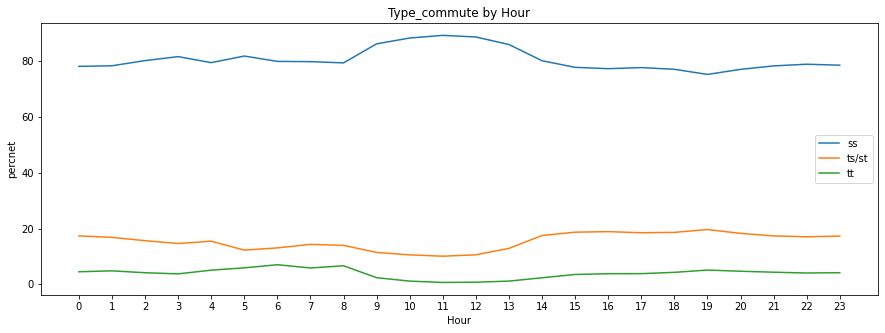

In [52]:
lineplot_commute(legle,'Hour')

### There is no big difference in the portion of Type_commute in months

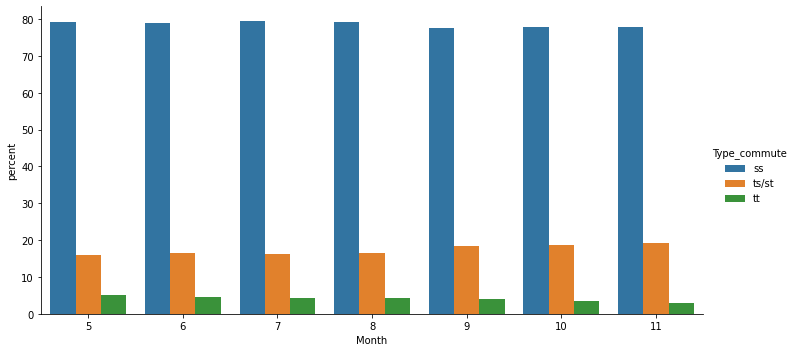

In [53]:
df=legle.groupby('Month')['Type_commute'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
g = sns.catplot(x='Month',y='percent',hue='Type_commute',kind='bar',data=df,height=5, aspect=2)
#g.set_xticklabels(['0-1','1-3','3-5','5-7'])#*** X order

### There is no big difference in the portion of Type_commute in terms of summer or not

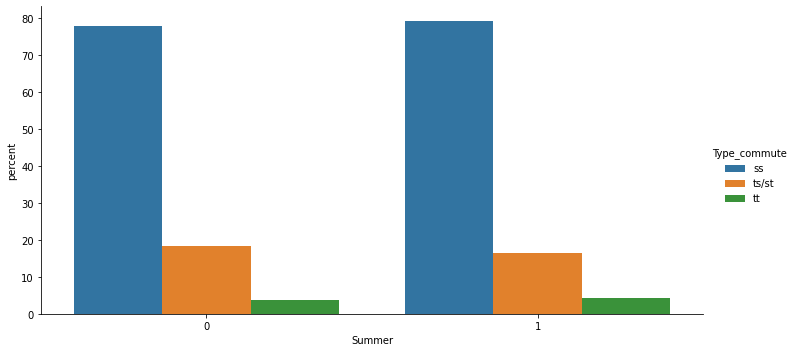

In [54]:
df=legle.groupby('Summer')['Type_commute'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
g = sns.catplot(x='Summer',y='percent',hue='Type_commute',kind='bar',data=df,height=5, aspect=2)
#g.set_xticklabels(['0-1','1-3','3-5','5-7'])#*** X order

### it seems like people traveling as type tt has its own pattern
### ss, ts/st have similiar pattern
### besdies the pattern can be divided in to Sunday and Saturday one and weekdays one

In [55]:
def lineplot_commute_wk(data,target,name):
    fig,axes=plt.subplots(2,4,figsize=(20,20),sharex=True,sharey=True)  
    plt.subplots_adjust(top=0.4,hspace =1 )
    r=0
    c=-1
    for i in ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']:
        c=c+1
        if c==4:
            c=0
            r=1
        df = data[data['Weekday']==i].groupby(['Type_commute'])[target+'_n'].value_counts(normalize=True)
        df = df.mul(100)
        df = df.rename('percent').reset_index()
        df
        #print(df)
        for j in ['ss','ts/st','tt']:
            temp=df[df['Type_commute']==j][[target+'_n','percent']].sort_values(by=[target+'_n'])
            axes[r][c].plot(temp.iloc[:,0],temp.iloc[:,1],label=j)
        axes[r][c].set_xticks(range(len(name)))
        axes[r][c].set_xticklabels(name,rotation=90)
        axes[r][c].set_title(i+target)
        axes[r][c].legend()

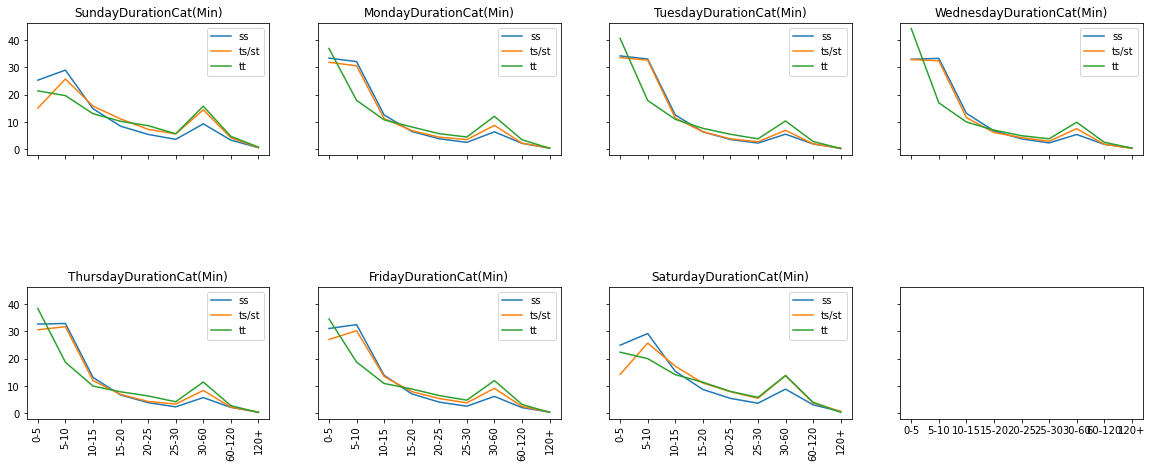

In [56]:
duration_label=['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+']
lineplot_commute_wk(legle,'DurationCat(Min)',duration_label)

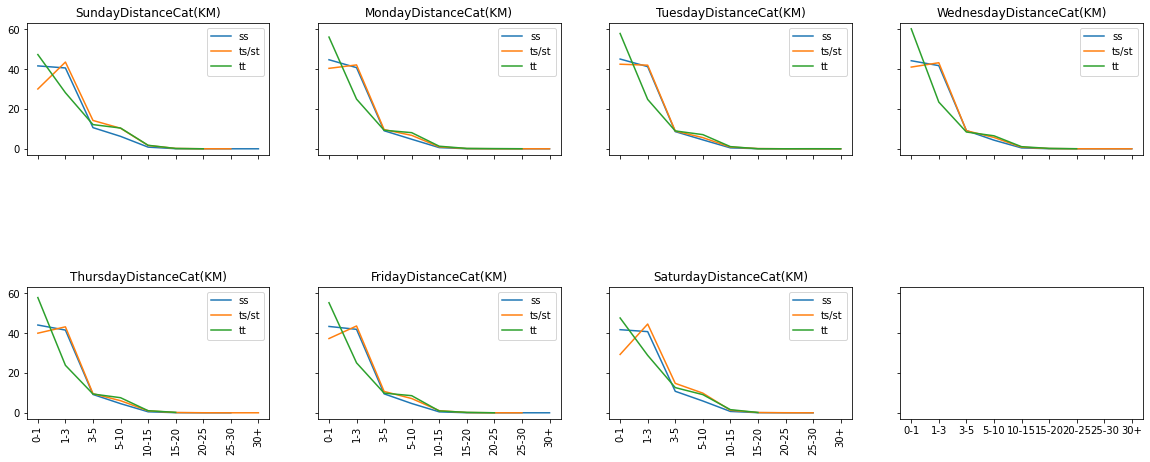

In [57]:
distance_label=['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+']
lineplot_commute_wk(legle,'DistanceCat(KM)',distance_label)

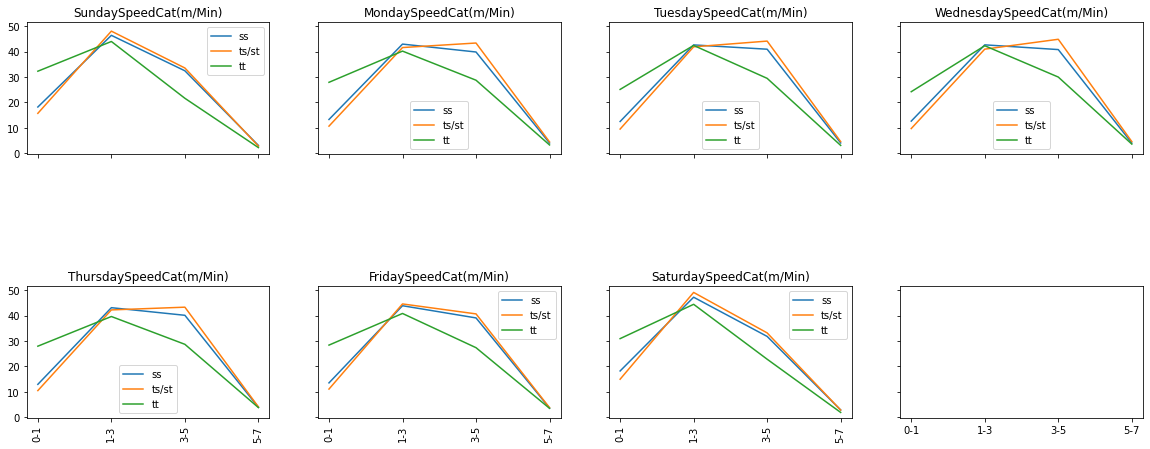

In [58]:
speed_lable=['0-1','1-3','3-5','5-7']
lineplot_commute_wk(legle,'SpeedCat(m/Min)',speed_lable)

In [59]:
def lineplot_commute_m(data,target,name):
    fig,axes=plt.subplots(2,4,figsize=(20,20),sharex=True,sharey=True)  
    plt.subplots_adjust(top=0.4,hspace =1 )
    r=0
    c=-1
    for i,k in zip(range(5,12,1),['May','June','July','August','September','October','November']):
        c=c+1
        if c==4:
            c=0
            r=r+1
        df = data[data['Month']==i].groupby(['Type_commute'])[target+'_n'].value_counts(normalize=True)
        df = df.mul(100)
        df = df.rename('percent').reset_index()
        df
        #print(df)
        for j in ['ss','ts/st','tt']:
            temp=df[df['Type_commute']==j][[target+'_n','percent']].sort_values(by=[target+'_n'])
            axes[r][c].plot(temp.iloc[:,0],temp.iloc[:,1],label=j)
        axes[r][c].set_xticks(range(len(name)))
        axes[r][c].set_xticklabels(name,rotation=90)
        axes[r][c].set_title(str(k)+target)
        axes[r][c].legend()
        

### from May to August they have quit similiar pattern
### in September to November, the short duration trip is larger

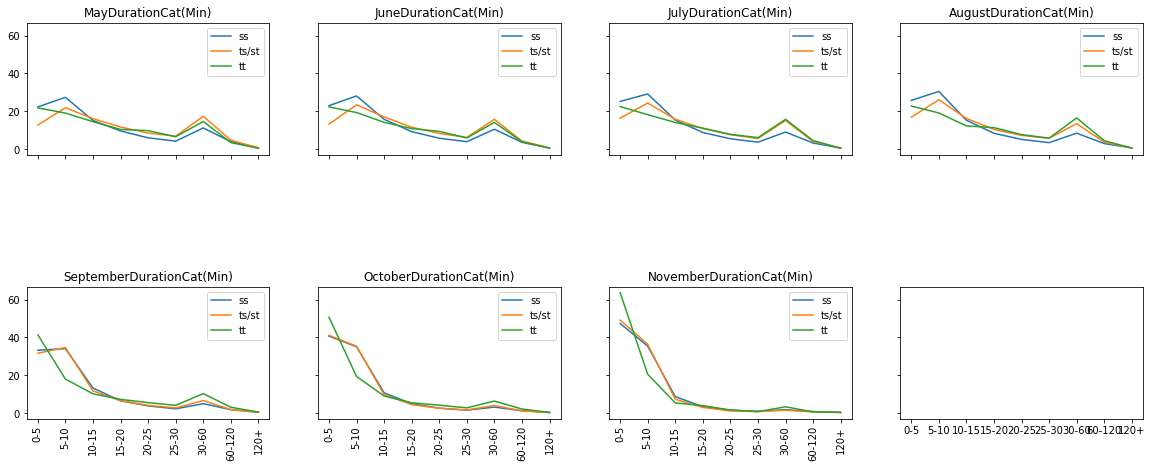

In [60]:
duration_label=['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+']
lineplot_commute_m(legle,'DurationCat(Min)',duration_label)

### tt in short distance has more contribution in September to November 
### people tend to have longer distance trip more  from June to August

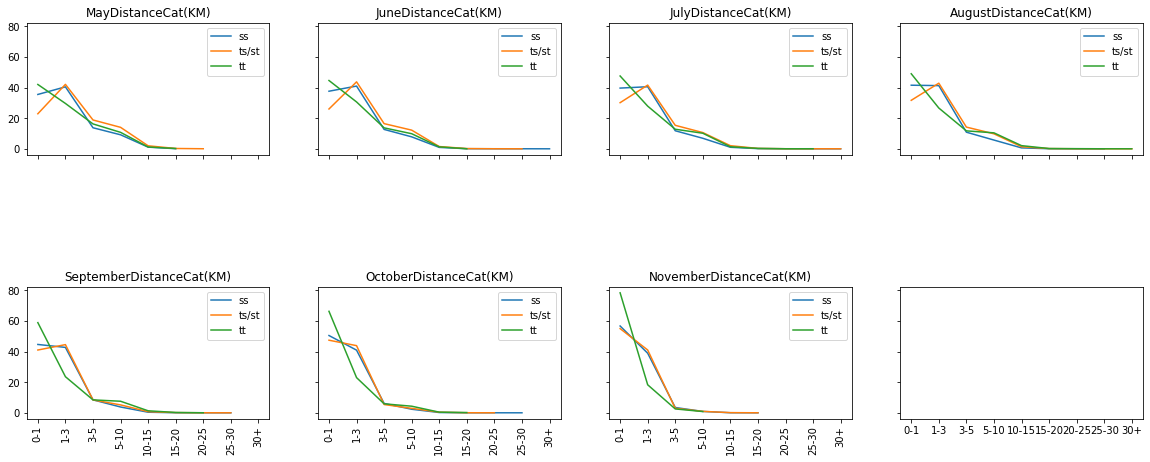

In [61]:
distance_label=['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+']
lineplot_commute_m(legle,'DistanceCat(KM)',distance_label)

### the portion of ts/st are closer to the portion of ss during summer 
### it implies that summer might have something to do with st/ts 

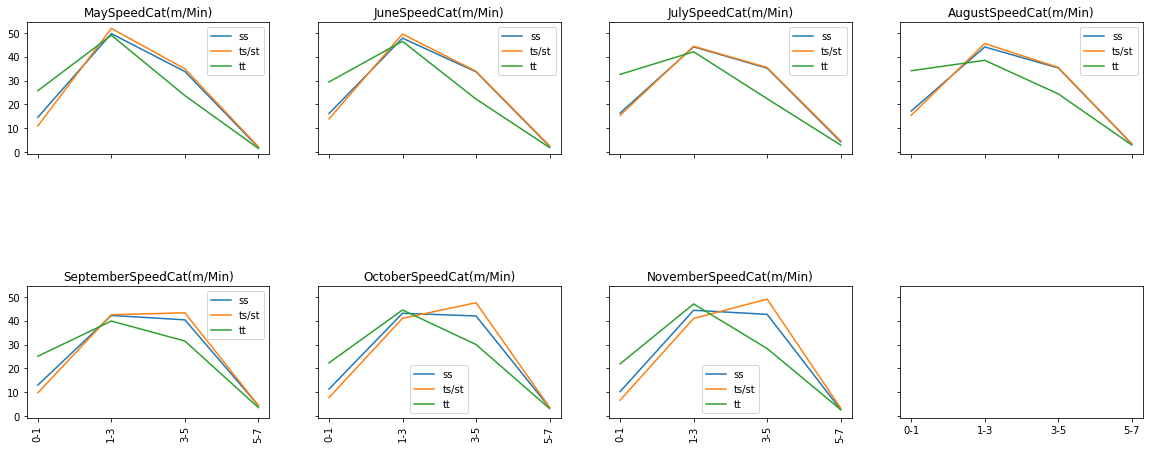

In [62]:
speed_lable=['0-1','1-3','3-5','5-7']
lineplot_commute_m(legle,'SpeedCat(m/Min)',speed_lable)

# Let's use TripDuration and TripDistance to cluster those data points

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

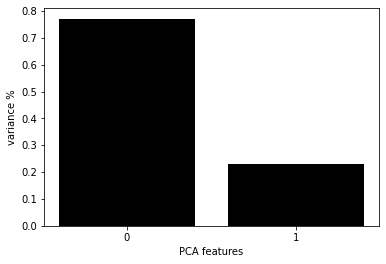

In [66]:
df=legle[['TripDuration','TripDistance']]
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

### divid into 4 clusters would be a great choice

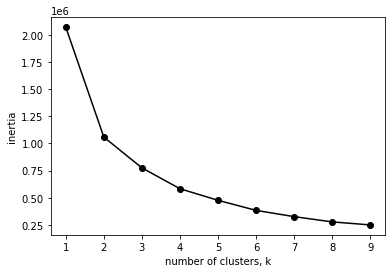

In [67]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

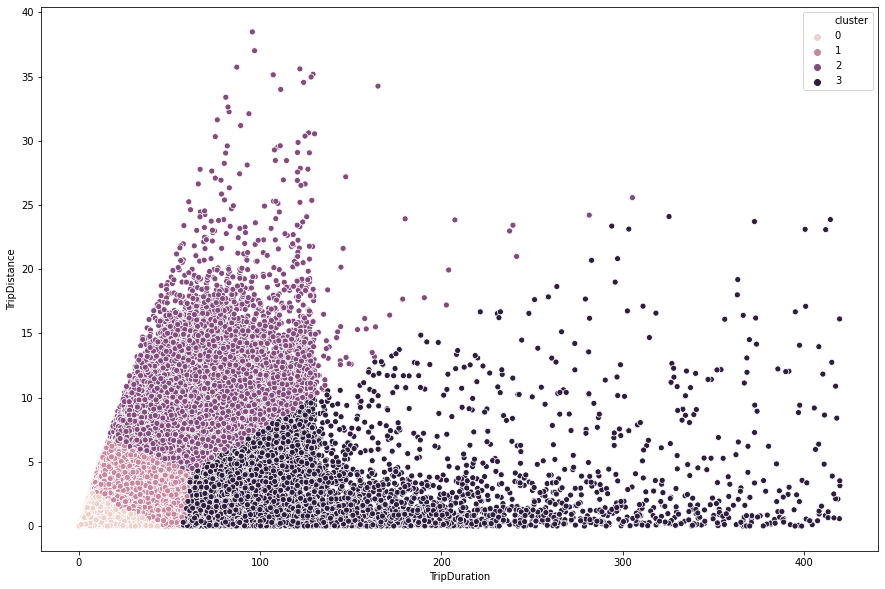

In [70]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(X_std)
y_predicted
legle['cluster'] = y_predicted
legle.head()
plt.figure(figsize=(15,10))
sns.scatterplot(x='TripDuration',y='TripDistance',hue='cluster',data=legle,legend='full')
plt.legend()

In [71]:
legle['cluster'] = y_predicted
legle.head()

,TripDuration,TripDistance,Month,Hour,Weekday,Weekday_n,Woy,Weekend,Speed,StartType,...,Type_st_n,Type_commute_n,DurationCat(Min),DurationCat(Min)_n,DistanceCat(KM),DistanceCat(KM)_n,SpeedCat(m/Min),SpeedCat(m/Min)_n,Summer,cluster
0,47.766667,9.521,5,20,Monday,0,20,1,3.322052,0,...,3,3,30-60,6,5-10,3,3-5,2,0,2
1,23.116667,5.753,5,20,Monday,0,20,1,4.147801,1,...,4,1,20-25,4,5-10,3,3-5,2,0,1
2,16.033333,1.630,5,20,Monday,0,20,1,1.694387,1,...,4,1,15-20,3,1-3,1,1-3,1,0,0
3,7.050000,2.149,5,20,Monday,0,20,1,5.080378,1,...,4,1,5-10,1,1-3,1,5-7,3,0,0
4,63.550000,6.943,5,20,Monday,0,20,1,1.820876,1,...,1,2,60-120,7,5-10,3,1-3,1,0,2


### cluster 0 and 1 explain the most of the portion of the points

0 cluster accounts for 72.21%
1 cluster accounts for 4.36%
2 cluster accounts for 21.57%
3 cluster accounts for 1.86%


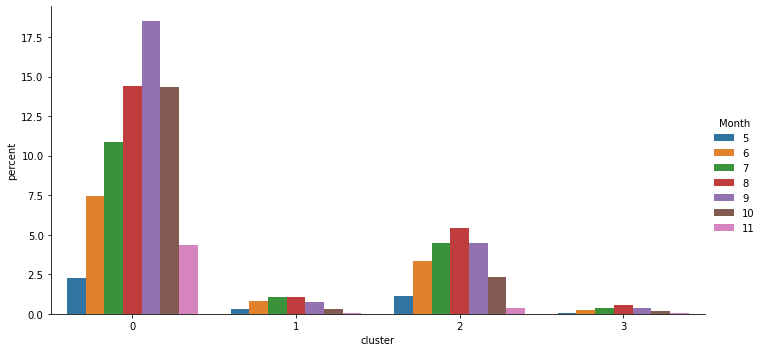

In [127]:
cluster_month(legle)
for i in range(4):
    print(i,'cluster accounts for',str(round(len(legle[legle['cluster']==i])/len(legle)*100,2))+"%")
    

(0.0, 10.0)

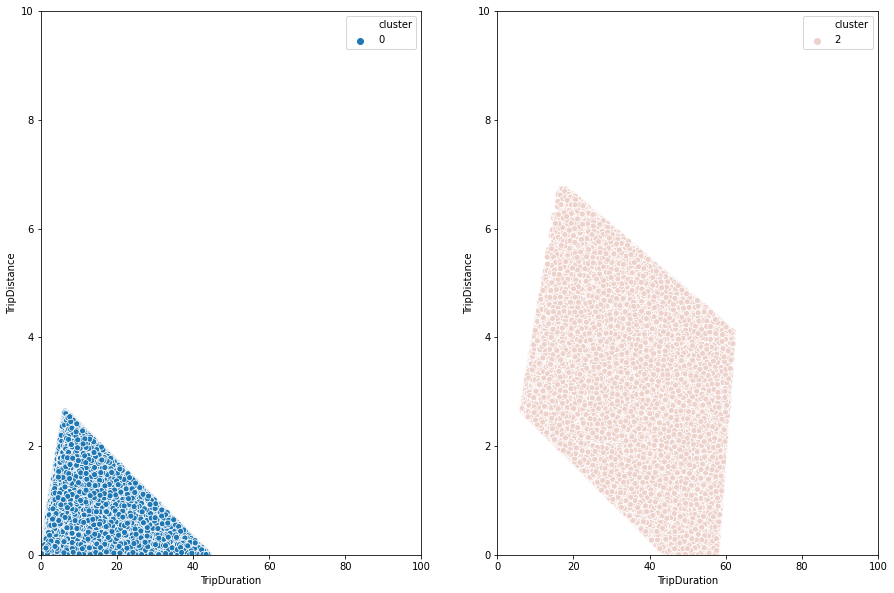

In [138]:
fig,axes=plt.subplots(1,2,figsize=(15,10))
sns.scatterplot(x='TripDuration',y='TripDistance',hue='cluster',data=legle[legle['cluster']==0],legend='full',ax=axes[0])
#sns.scatterplot(x='TripDuration',y='TripDistance',hue='cluster',data=legle[legle['cluster']==1],legend='full',ax=axes[0][1])
sns.scatterplot(x='TripDuration',y='TripDistance',hue='cluster',data=legle[legle['cluster']==2],legend='full',ax=axes[1])
#sns.scatterplot(x='TripDuration',y='TripDistance',hue='cluster',data=legle[legle['cluster']==3],legend='full',ax=axes[1][1])
axes[0].set_xlim(0, 100)
axes[0].set_ylim(0, 10)
axes[1].set_xlim(0, 100)
axes[1].set_ylim(0, 10)


In [84]:
def tripplot_percent_cluster(data):
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
    df=data.groupby('DurationCat(Min)',sort=False).size()/len(legle)*100
    ax1.set_title("TripDuration")
    ax1.set_xticks=list(range(8))
     
    ax1.set_xticklabels(['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+'],rotation=90)
    ax1.bar(df.index,list(df))
    show_values_on_bars(ax1)
    
    df=data.groupby('DistanceCat(KM)',sort=False).size()/len(legle)*100
    ax2.bar(df.index,list(df))
             
    show_values_on_bars(ax2)
    ax2.set_xticks=list(range(8))
    ax2.set_xticklabels(['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+'],rotation=90)
    ax2.bar(df.index,list(df))
    ax2.set_title("TripDistance")#sub-title
    
    fig.suptitle(#sup-title#*******
        'TripDuration and TripDistance',fontsize=20)


AverageSpeed 2.5699109330956205


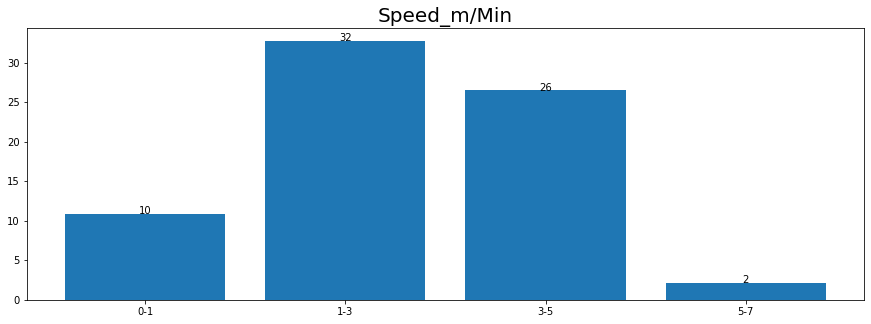

AverageSpeed 2.947298719819877


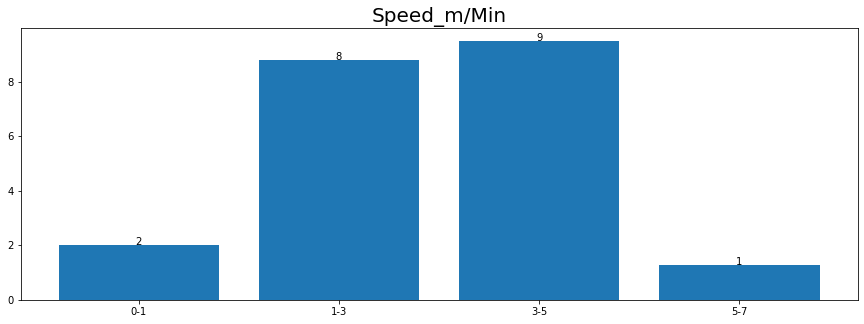

In [140]:
for i in [0,2]:
    speedplot_legle(legle[legle['cluster']==i])

In [117]:
def cluster_month(data):
    df=data.groupby(['Month','cluster'],sort=False).size()/len(data)*100#percentagge
    df = df.rename('percent').reset_index()#name the column
    g = sns.catplot(x='cluster',y='percent',kind='bar',data=df,height=5, aspect=2,hue='Month')
    
    

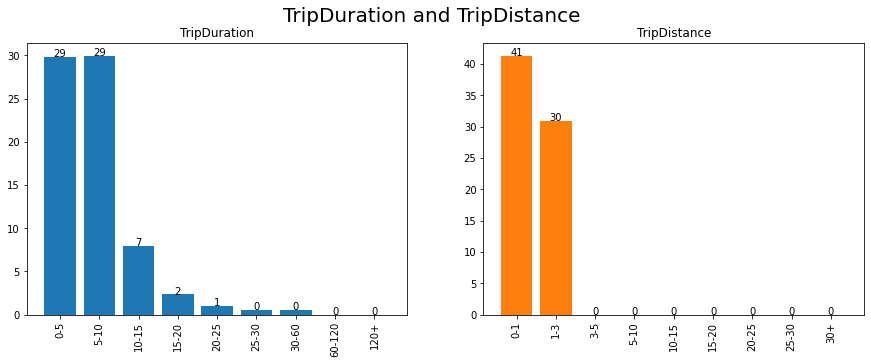

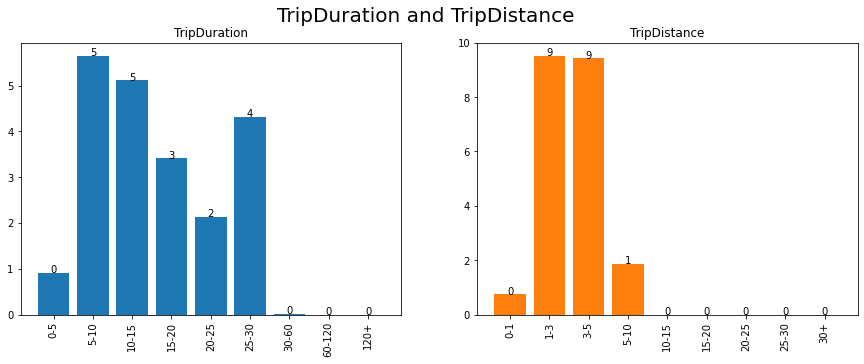

In [141]:
for i in [0,2]:
    tripplot_percent_cluster(legle[legle['cluster']==i])

In [143]:
target_customer=legle[legle['cluster']==0]
target_customer.shape

(747699, 24)

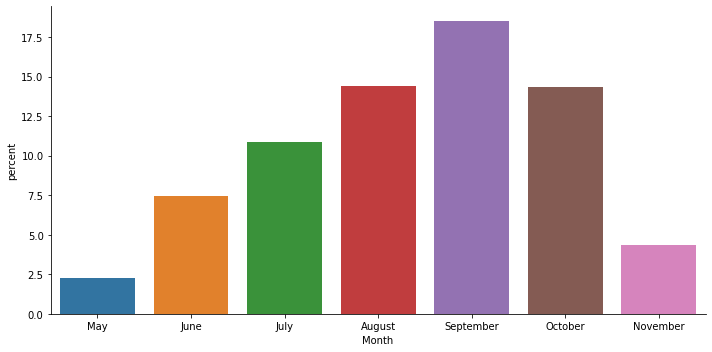

In [144]:
df=target_customer.groupby('Month',sort=False).size()/len(legle)*100#percentagge
df = df.rename('percent').reset_index()#name the column
g = sns.catplot(x='Month',y='percent',kind='bar',data=df,height=5, aspect=2)
g.set_xticklabels(['May','June','July','August','September','October','November'])#*** X order

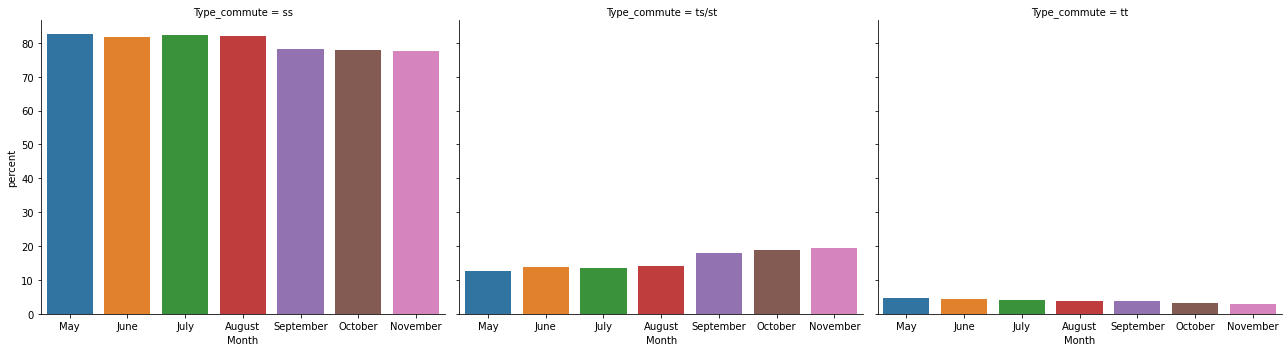

In [146]:
df=target_customer.groupby(['Month'])['Type_commute'].value_counts(normalize=True)#percentagge
df=df.mul(100)
df = df.rename('percent').reset_index()#name the column
g = sns.catplot(x='Month',y='percent',kind='bar',data=df,height=5, aspect=1.2,col='Type_commute')#colwrap=2)
g.set_xticklabels(['May','June','July','August','September','October','November'])#*** X order

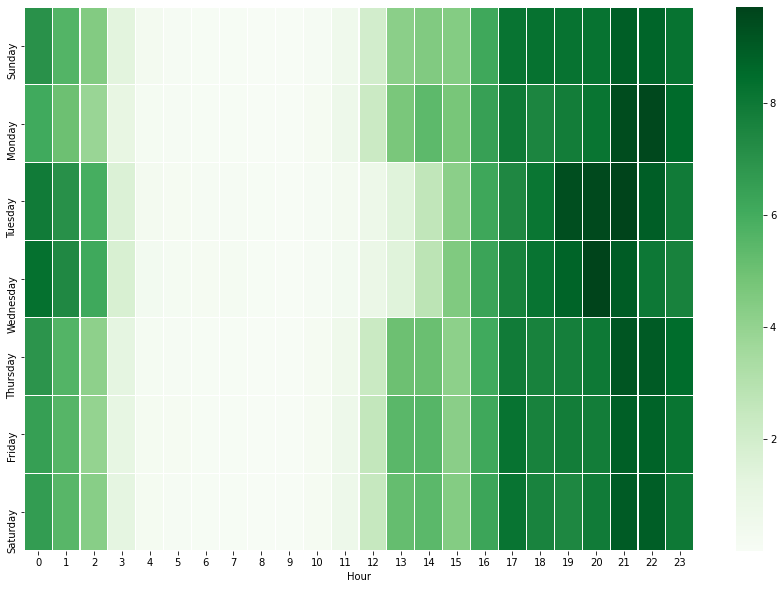

In [147]:
plt.figure(figsize=(15,10))
df=target_customer.groupby('Weekday')['Hour'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()


temp=df.pivot("Weekday", "Hour", "percent")
temp.index=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# Draw a heatmap with the numeric values in each cell
sns.heatmap(temp,linewidths=.1,cmap="Greens")

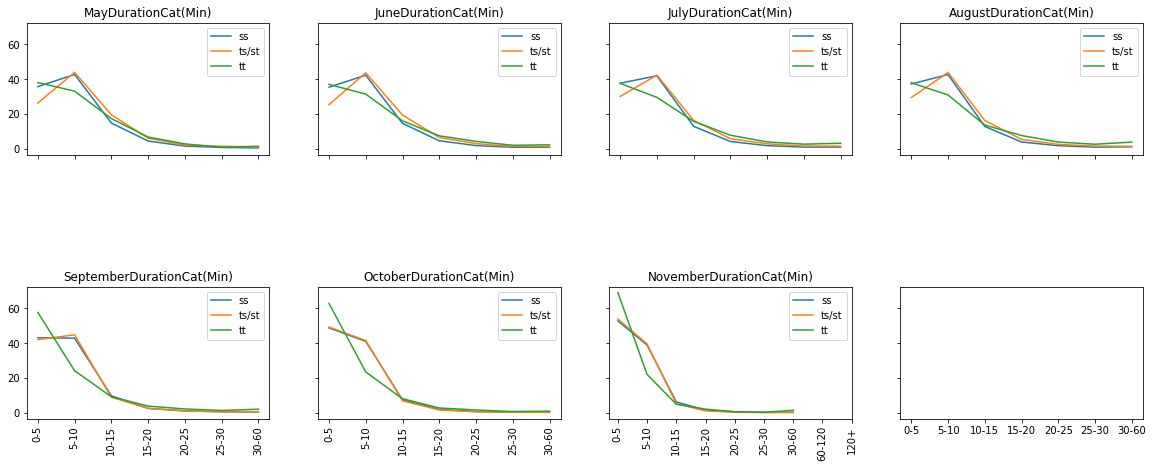

In [148]:
duration_label=['0-5','5-10','10-15','15-20','20-25','25-30','30-60','60-120','120+']
lineplot_commute_m(target_customer,'DurationCat(Min)',duration_label)

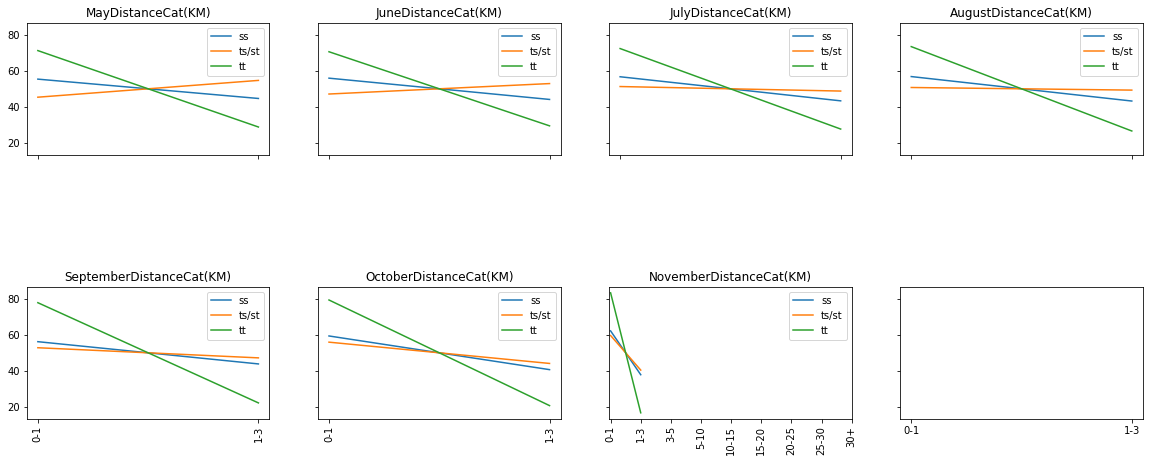

In [151]:
distance_label=['0-1','1-3','3-5','5-10','10-15','15-20','20-25','25-30','30+']
lineplot_commute_m(target_customer,'DistanceCat(KM)',distance_label)

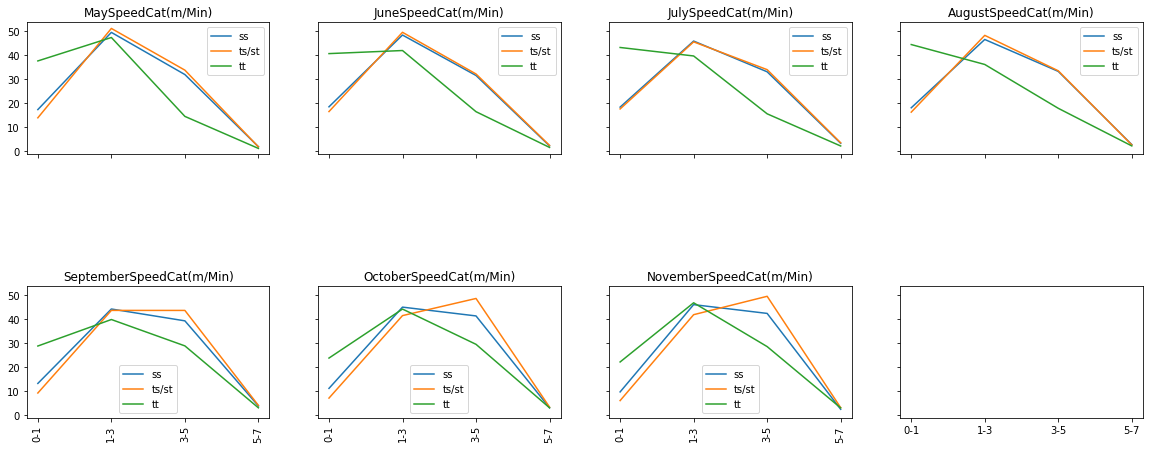

In [150]:
speed_lable=['0-1','1-3','3-5','5-7']
lineplot_commute_m(target_customer,'SpeedCat(m/Min)',speed_lable)